<a href="https://colab.research.google.com/github/atheistsoldier/TDoC-Stonksmaster/blob/task6/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from numpy import arange,set_printoptions
from matplotlib import pyplot as plt
from pandas import read_csv,set_option
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import time 
import datetime 
import sys

In [ ]:
import urllib.request as request
import json
with request.urlopen('https://sandbox.iexapis.com/stable/stock/twtr/chart/5y?token=Tsk_1c108c2cad3548359f9590ed5343edd9') as response:
  if response.getcode() == 200:
    source = response.read()
    data = json.loads(source)
  else:
    print('An error occurred while attempting to retrieve data from the API.')

In [ ]:
df=pd.read_json('https://sandbox.iexapis.com/stable/stock/twtr/chart/5y?token=Tsk_1c108c2cad3548359f9590ed5343edd9')
df=df.dropna()
df

,date,uClose,uOpen,uHigh,uLow,uVolume,close,open,high,low,volume,currency,change,changePercent,label,changeOverTime
0,2015-10-12,29.77,30.60,30.99,30.00,31381697,29.92,31.50,31.53,29.10,31234467,,0.00,0.0000,"Oct 12, 15",0.000000
1,2015-10-13,29.51,29.96,31.77,30.15,46326153,29.60,29.78,30.78,29.21,45963273,,0.31,1.0982,"Oct 13, 15",0.010990
2,2015-10-14,29.72,29.84,30.49,28.98,28780556,29.45,30.26,30.43,29.24,27878773,,0.33,1.1362,"Oct 14, 15",0.022113
3,2015-10-15,30.35,30.58,31.73,29.82,16406857,30.14,30.26,30.30,30.42,16513212,,0.35,1.1567,"Oct 15, 15",0.034899
4,2015-10-16,31.75,30.62,32.80,30.80,45021538,31.68,30.44,32.20,30.16,46228721,,1.46,4.9878,"Oct 16, 15",0.084640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2020-10-05,48.10,46.73,49.50,46.78,11722802,48.64,46.68,49.50,47.26,11419731,,1.24,2.6749,"Oct 5, 20",0.658630
1255,2020-10-06,46.20,48.91,48.66,45.67,16149404,47.80,49.48,48.65,45.40,16369673,,-1.78,-3.7030,"Oct 6, 20",0.607824
1256,2020-10-07,46.48,46.14,47.10,46.16,20284412,47.94,48.13,47.20,47.09,19476396,,0.28,0.6097,"Oct 7, 20",0.604220
1257,2020-10-08,46.60,47.55,48.31,47.40,11685970,47.02,46.45,47.42,47.13,11914358,,0.14,0.3177,"Oct 8, 20",0.606774


In [ ]:
adjusted_df=df.loc[:,["date","open"]]
na=[]
for i in adjusted_df.date:
  timestamp = datetime.datetime.timestamp(i)
  na.append(timestamp)
ar=np.array(na)
adjusted_df['timestamp']=ar
adjusted_df

,date,open,timestamp
0,2015-10-12,31.50,1.444608e+09
1,2015-10-13,29.78,1.444694e+09
2,2015-10-14,30.26,1.444781e+09
3,2015-10-15,30.26,1.444867e+09
4,2015-10-16,30.44,1.444954e+09
...,...,...,...
1254,2020-10-05,46.68,1.601856e+09
1255,2020-10-06,49.48,1.601942e+09
1256,2020-10-07,48.13,1.602029e+09
1257,2020-10-08,46.45,1.602115e+09


In [ ]:
dataset=adjusted_df.values
dataset

array([[Timestamp('2015-10-12 00:00:00'), 31.5, 1444608000.0],
       [Timestamp('2015-10-13 00:00:00'), 29.78, 1444694400.0],
       [Timestamp('2015-10-14 00:00:00'), 30.26, 1444780800.0],
       ...,
       [Timestamp('2020-10-07 00:00:00'), 48.13, 1602028800.0],
       [Timestamp('2020-10-08 00:00:00'), 46.45, 1602115200.0],
       [Timestamp('2020-10-09 00:00:00'), 46.8, 1602201600.0]],
      dtype=object)

In [ ]:
Y=dataset[:,1]
X=dataset[:,2:3]

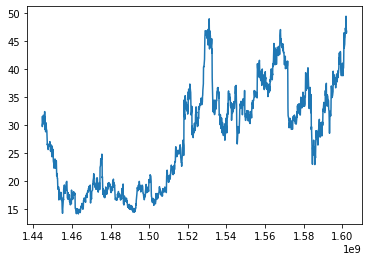

In [ ]:
plt.plot(X,Y)

In [ ]:
#standardising data
scaler=MinMaxScaler(feature_range=(0,1))
rX=scaler.fit_transform(X)
set_printoptions(precision=3)
print(rX[0:1,:])
rX

[[0.]]


array([[0.000e+00],
       [5.482e-04],
       [1.096e-03],
       ...,
       [9.989e-01],
       [9.995e-01],
       [1.000e+00]])

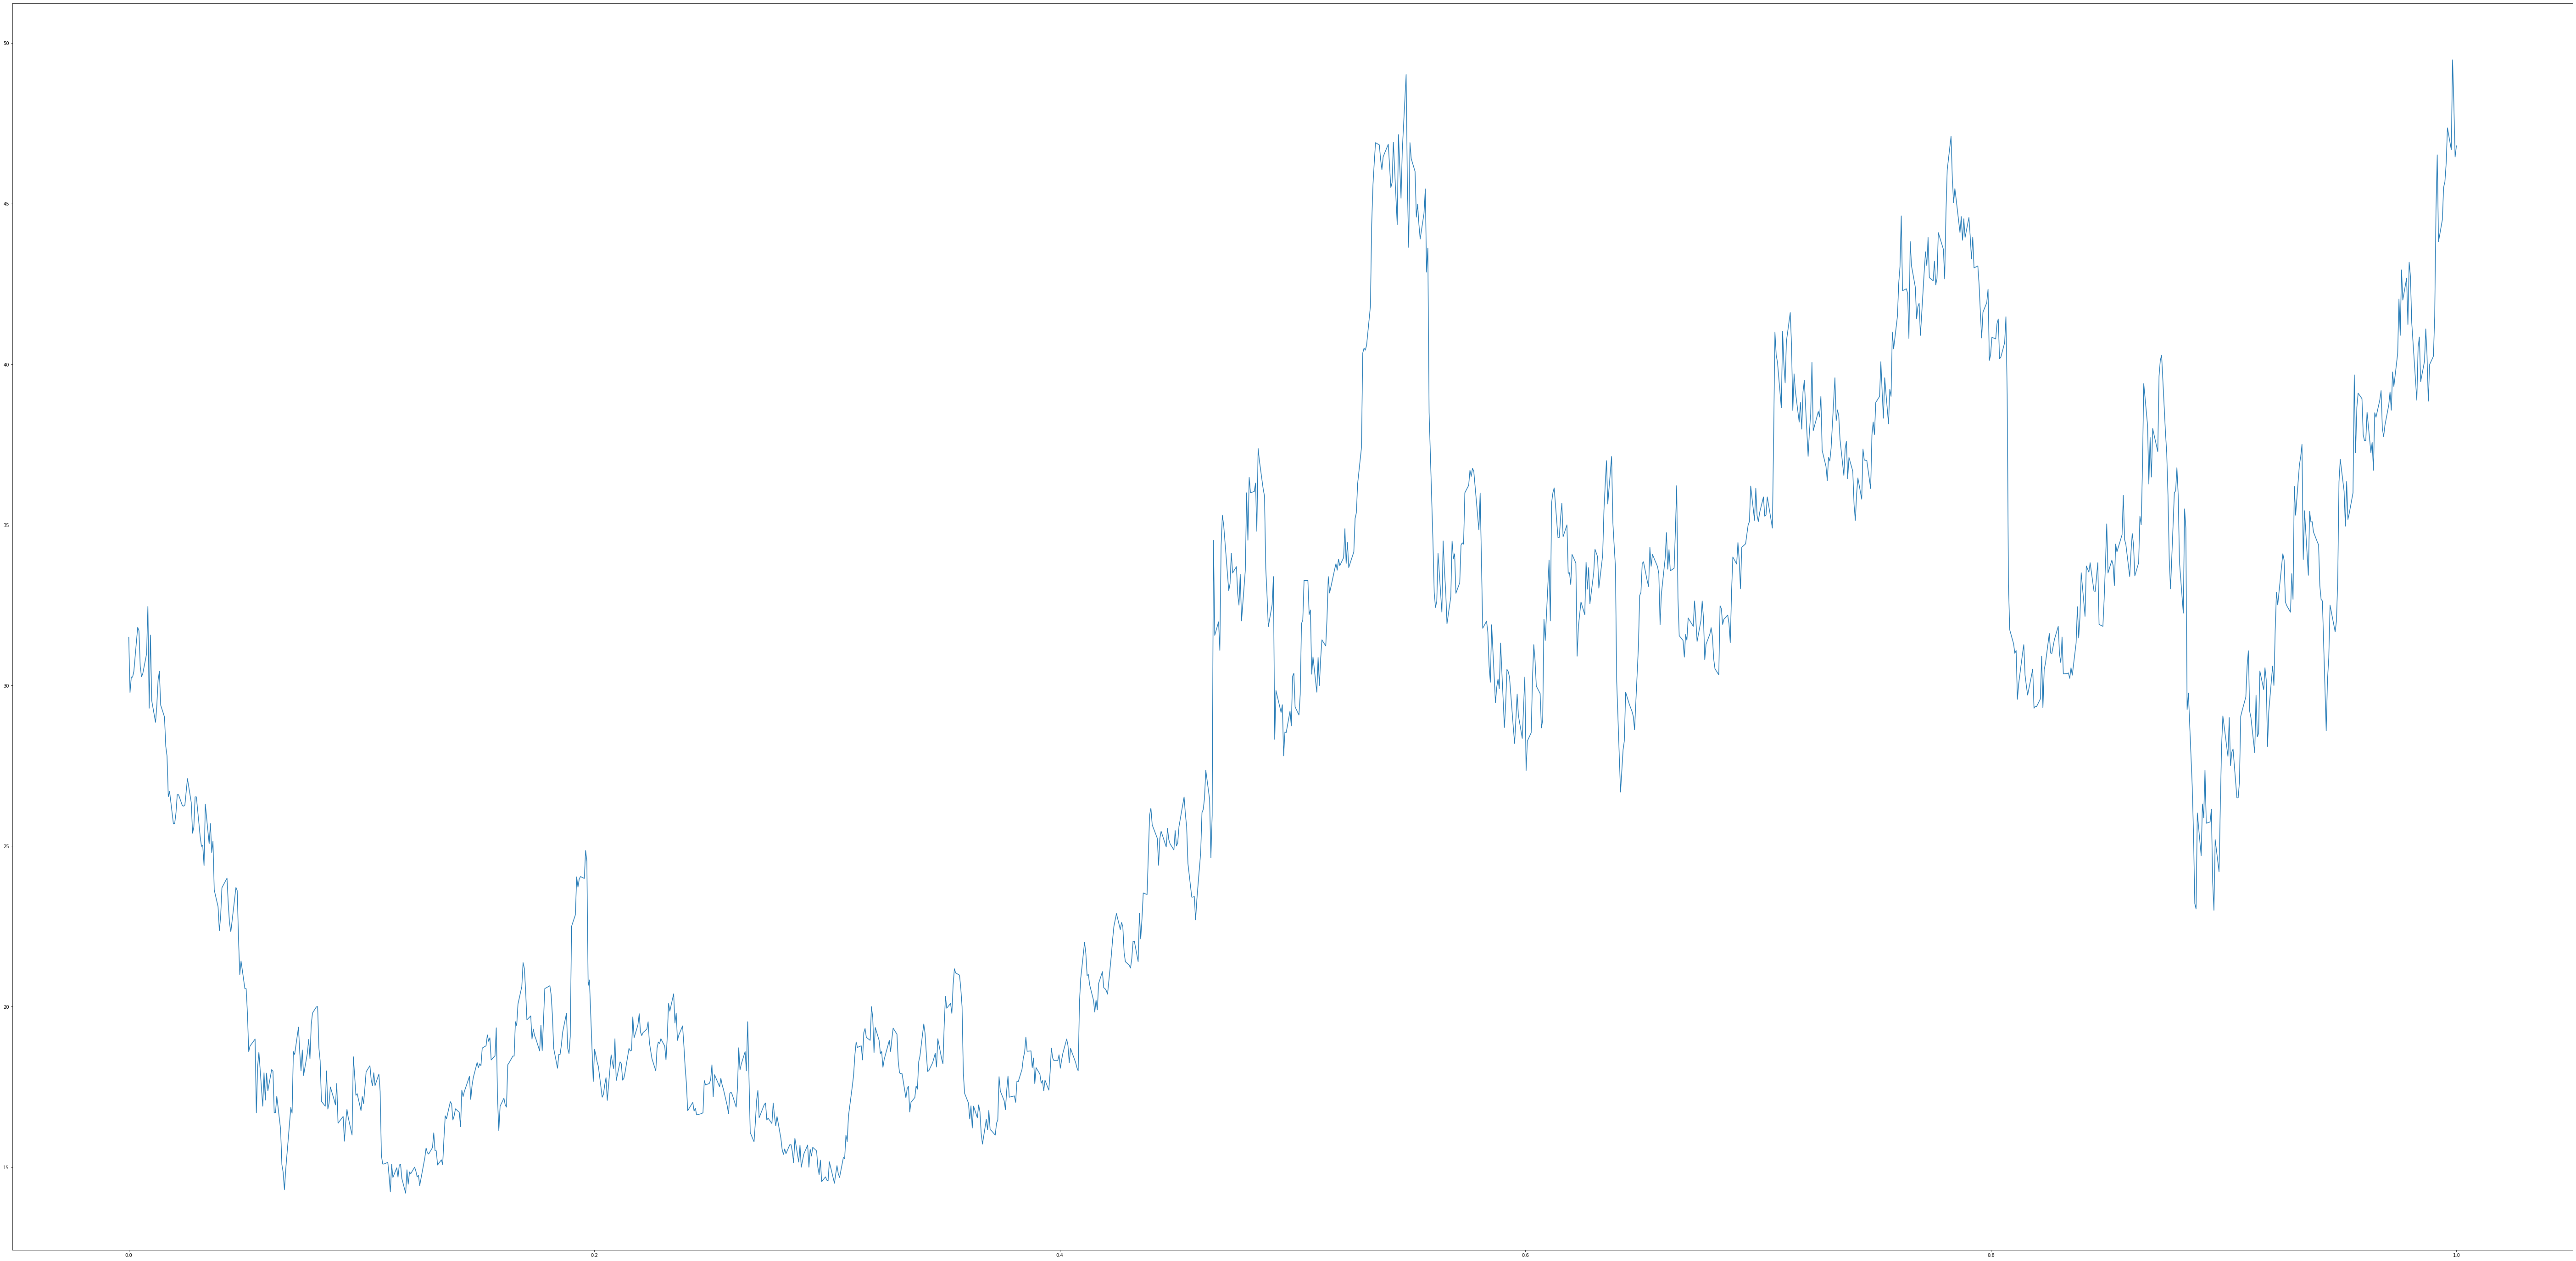

In [ ]:
plt.plot(rX,Y)

In [ ]:
validation_size=0.25
seed=0
X_train, X_test, Y_train, Y_test=train_test_split(rX,Y,test_size=validation_size,random_state=seed)

In [ ]:
num_fold=4
#num_fold 4 seems to give best R2 and better comparison
seed=1
scoring='r2'

In [ ]:
models=[]
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))
results=[]
names=[]
for name,model in models:
  kfold=KFold(n_splits=num_fold,random_state=seed,shuffle=True)
  cvResults=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
  results.append(cvResults)
  names.append(name)
  print("%s: %f (%f)"%(name,cvResults.mean(),cvResults.std()))

LR: 0.567763 (0.022800)
LASSO: 0.427085 (0.009850)
EN: 0.114334 (0.003732)
KNN: 0.983808 (0.001917)
CART: 0.981931 (0.003894)
SVR: 0.753061 (0.019195)


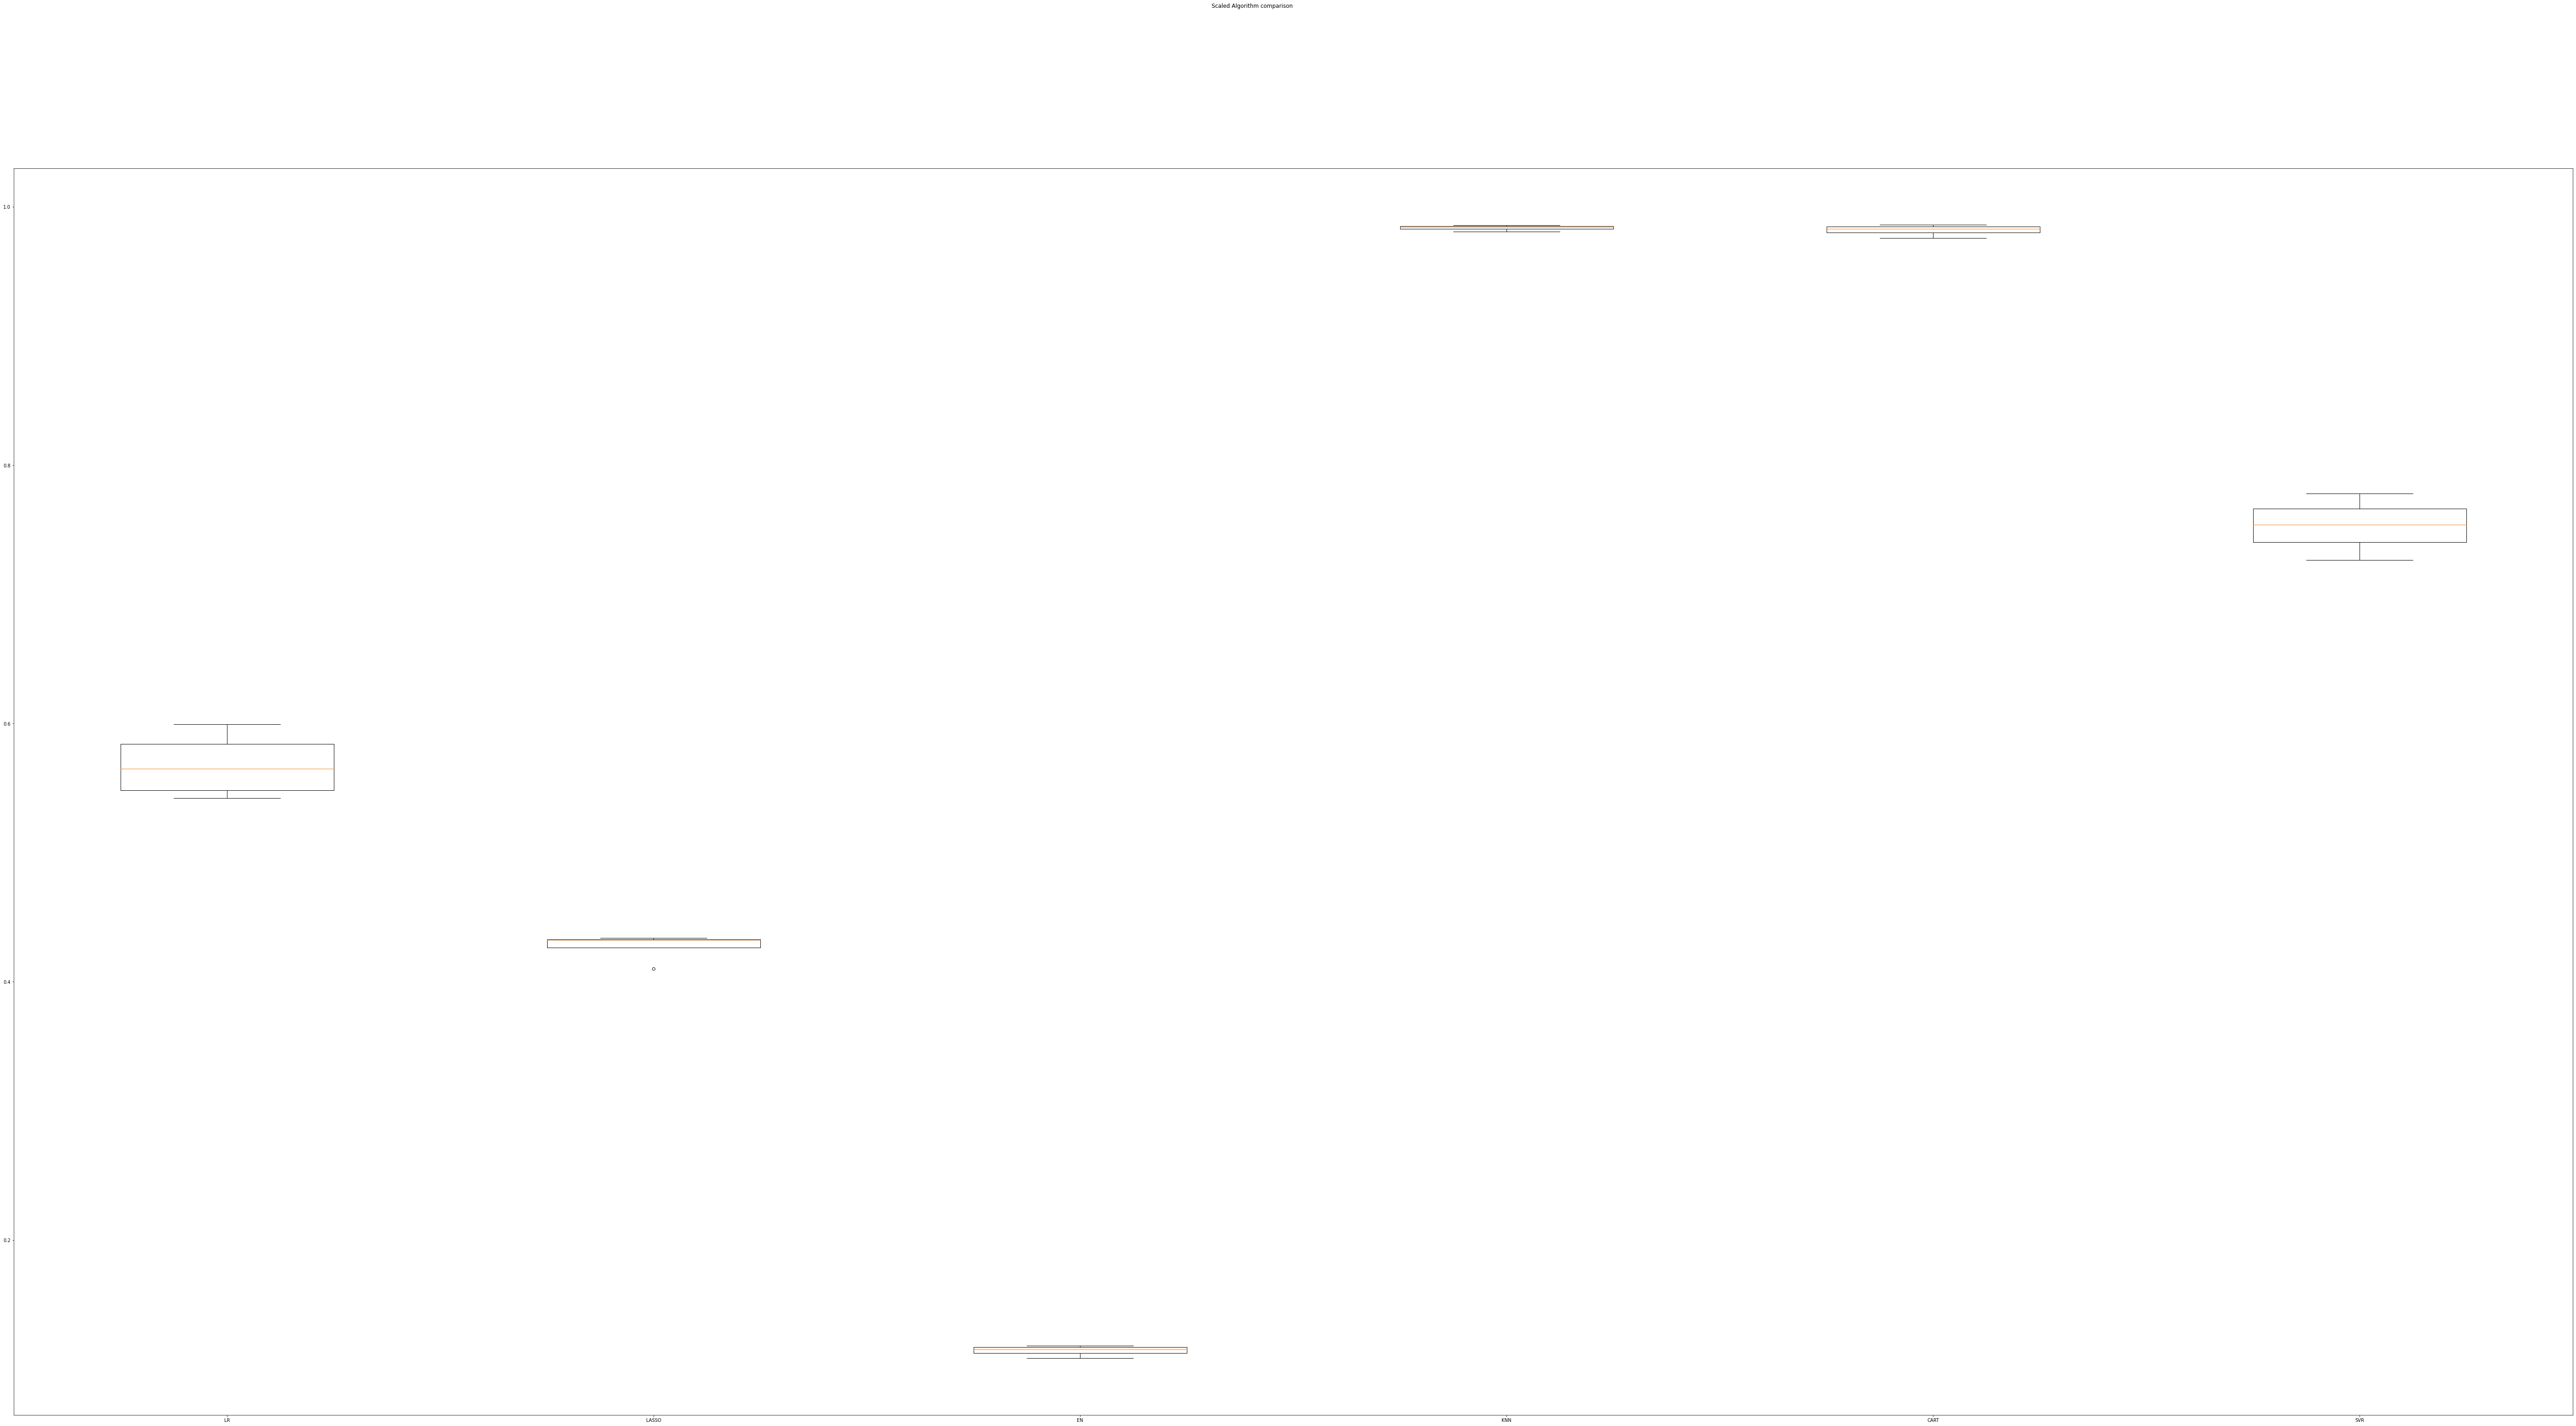

In [ ]:
#compare models
fig=plt.figure()
fig.suptitle("Scaled Algorithm comparison")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#preparing the model
model=KNeighborsRegressor()
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
print(r2_score(Y_test,predictions))

0.9889399189371332


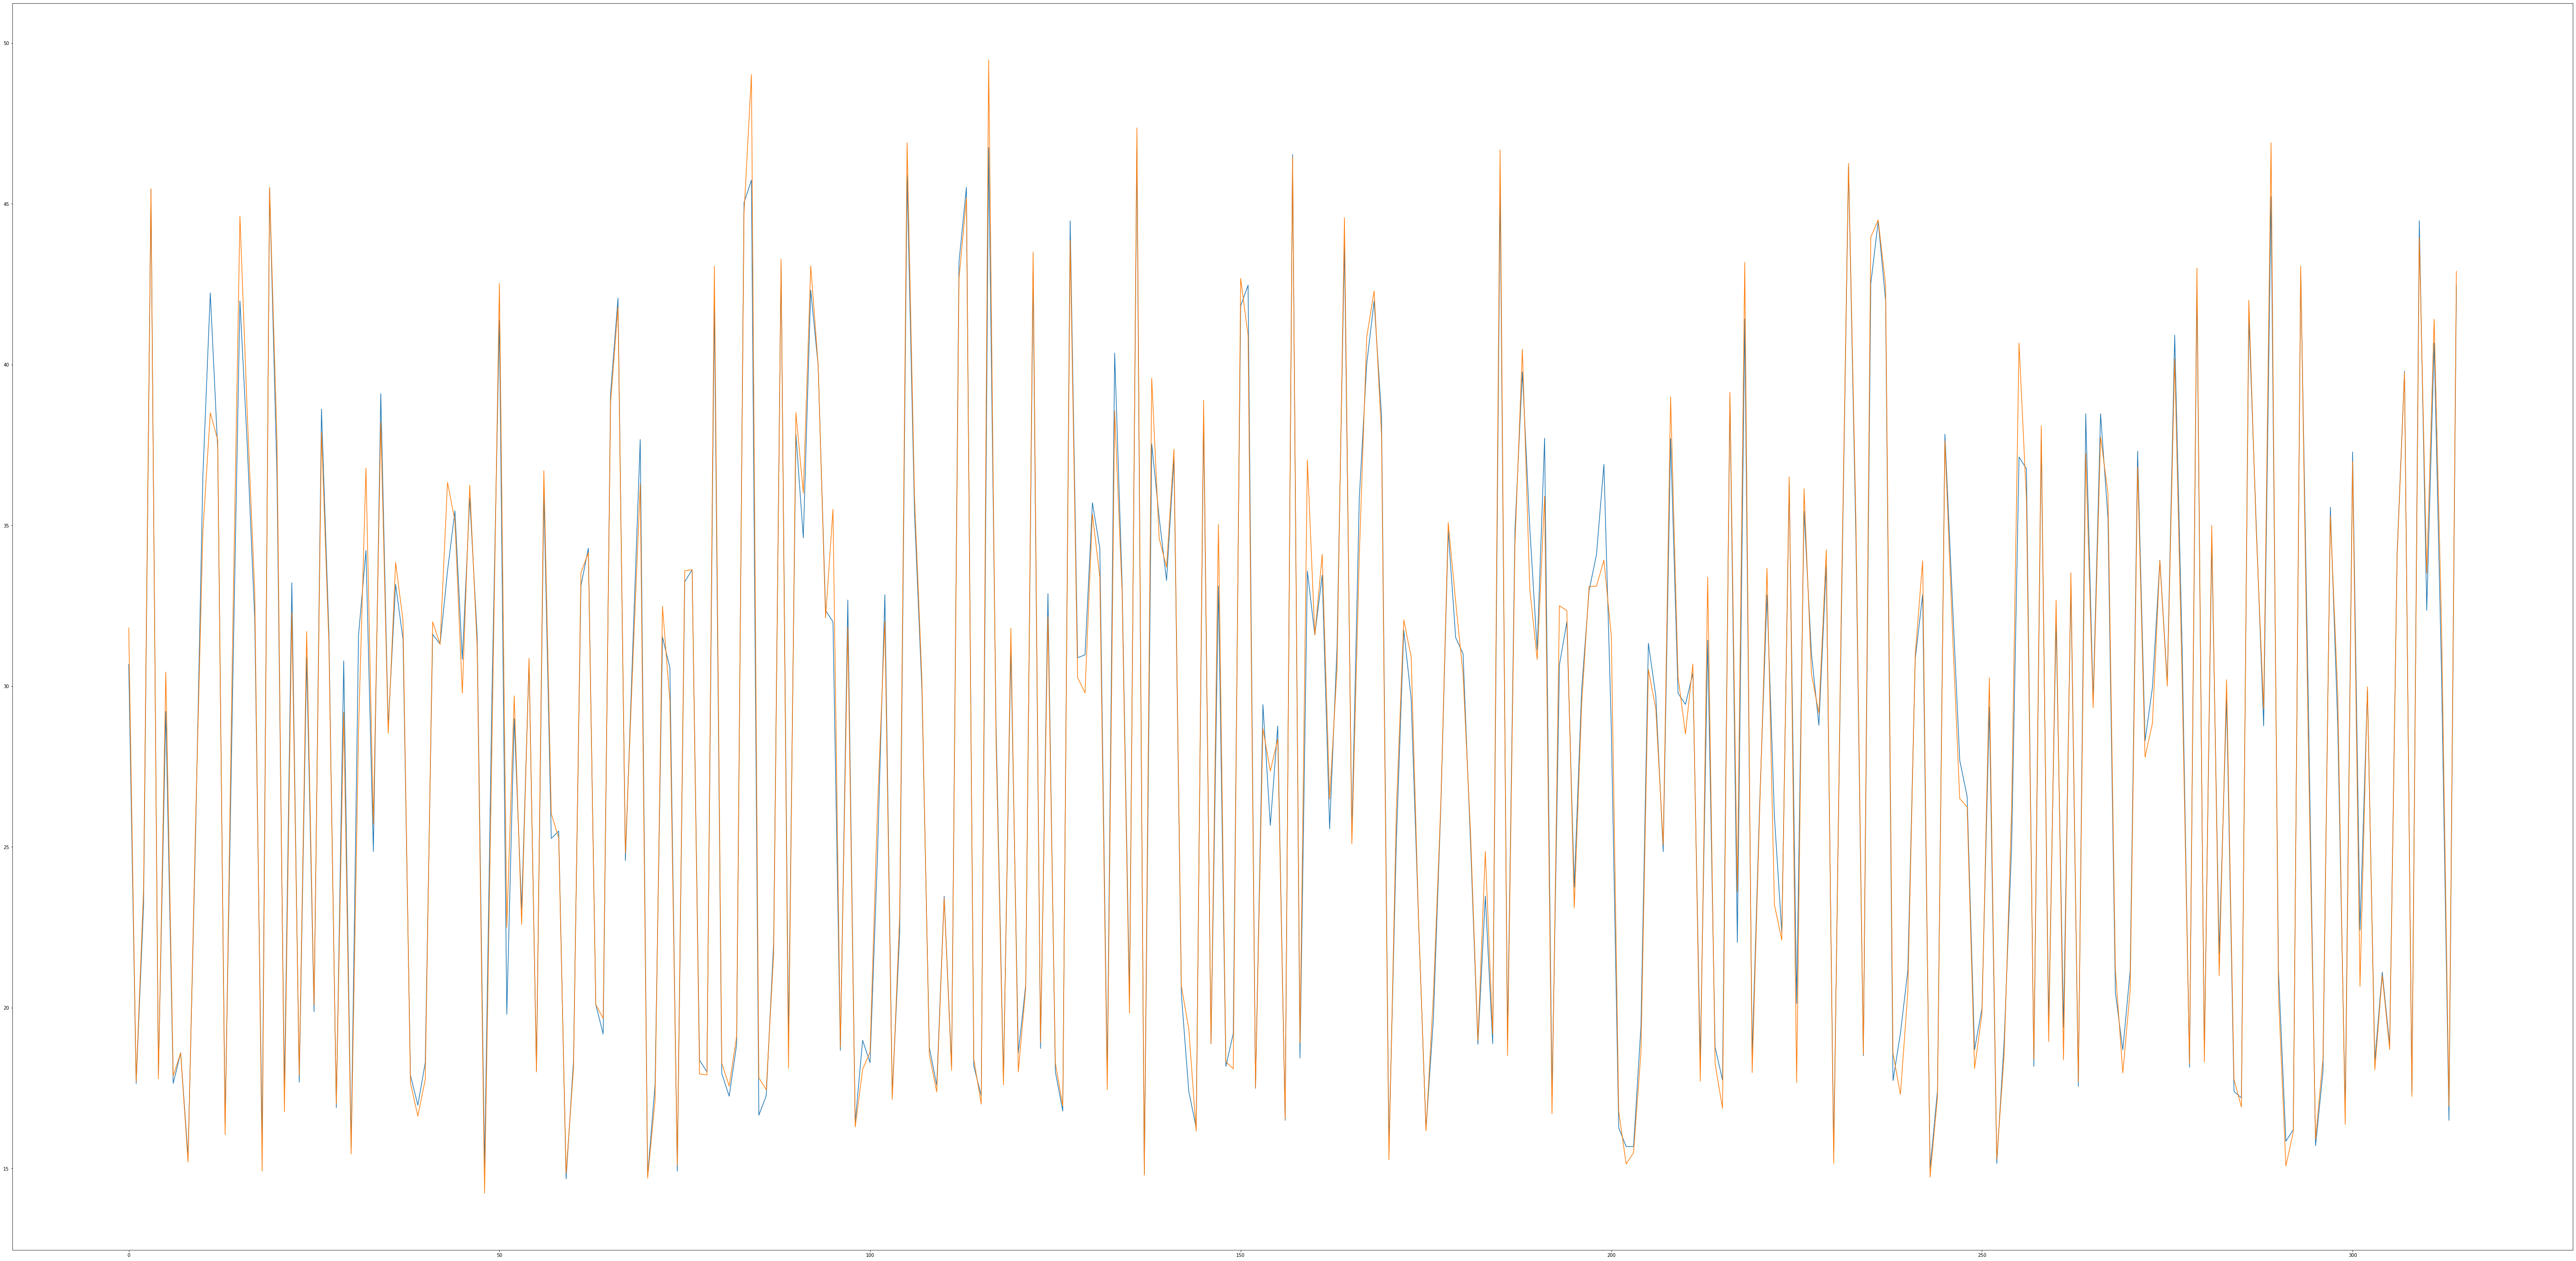

In [ ]:
plt.plot(predictions)
plt.plot(Y_test)

plt.rcParams['figure.figsize']=(100,50)
plt.show()